# Unsupervised Learning
## Dimensionality Reduction with PCA

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
import seaborn as sns
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

#### 1. Load the dataset and make your preprocessing like normalizing the data.

In [3]:
mnist = datasets.fetch_openml('Fashion-MNIST', version=1, cache=True)

In [17]:
# mnist

In [36]:
X = pd.DataFrame(mnist.data, columns=mnist.feature_names)
Y = pd.Series(mnist.target)

print(Y)
X

0        9
1        0
2        0
3        3
4        0
        ..
69995    9
69996    1
69997    8
69998    1
69999    5
Length: 70000, dtype: object


pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  \
0         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
1         0.0     0.0     0.0     0.0     0.0     1.0     0.0     0.0     0.0   
2         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
3         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0    33.0   
4         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
69995     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
69996     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
69997     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
69998     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
69999     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   

       pixel10  ...  pixel775  pixel776  pixel777  pixel778  pixel779  \
0          0.0  ...       0.0       0.0       0.0       0.0       0.0   
1          0.0  ...     119.0     114.0     130.0      76.0       0.0   
2         22.0  ...       0.0       0.0       1.0       0.0       0.0   
3         96.0  ...       0.0       0.0       0.0       0.0       0.0   
4          0.0  ...       0.0       0.0       0.0       0.0       0.0   
...        ...  ...       ...       ...       ...       ...       ...   
69995      0.0  ...       0.0       0.0       0.0       0.0       0.0   
69996     31.0  ...       0.0       0.0       0.0       0.0       0.0   
69997      0.0  ...      27.0       0.0       0.0       0.0       0.0   
69998      0.0  ...       0.0       0.0       0.0       0.0       0.0   
69999      0.0  ...       0.0       0.0       0.0       0.0       0.0   

       pixel780  pixel781  pixel782  pixel783  pixel784  
0           0.0       0.0       0.0       0.0       0.0  
1           0.0       0.0       0.0       0.0       0.0  
2           0.0       0.0       0.0       0.0       0.0  
3           0.0       0.0       0.0       0.0       0.0  
4           0.0       0.0       0.0       0.0       0.0  
...         ...       ...       ...       ...       ...  
69995       0.0       0.0       0.0       0.0       0.0  
69996       0.0       0.0       0.0       0.0       0.0  
69997       0.0       0.0       0.0       0.0       0.0  
69998       0.0       0.0       0.0       0.0       0.0  
69999       0.0       0.0       0.0       0.0       0.0  

[70000 rows x 784 columns]

In [37]:
sample_indices = X.sample(10000).index

X_sample = X.iloc[sample_indices]
Y_sample = Y[sample_indices]

print(Y_sample)
X_sample

28091    4
12167    9
20518    8
25497    1
67574    8
        ..
52908    3
20361    8
67578    4
40886    9
22843    7
Length: 10000, dtype: object


pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  \
28091     0.0     0.0     0.0     0.0     0.0     1.0     0.0     0.0     0.0   
12167     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
20518     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
25497     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
67574     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
52908     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
20361     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
67578     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
40886     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
22843     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   

       pixel10  ...  pixel775  pixel776  pixel777  pixel778  pixel779  \
28091      1.0  ...       0.0       0.0       0.0       1.0       0.0   
12167      0.0  ...       0.0       0.0       0.0       9.0       0.0   
20518      0.0  ...       0.0       0.0       0.0       0.0       0.0   
25497      0.0  ...      10.0       0.0       0.0       0.0       0.0   
67574      0.0  ...       0.0       0.0       0.0       0.0       0.0   
...        ...  ...       ...       ...       ...       ...       ...   
52908      0.0  ...       0.0       0.0       0.0       0.0       0.0   
20361      0.0  ...       0.0       0.0       0.0       0.0       0.0   
67578     21.0  ...       0.0       0.0       0.0       0.0       0.0   
40886      0.0  ...       0.0       0.0       0.0       0.0       0.0   
22843      0.0  ...       0.0       0.0       0.0       0.0       0.0   

       pixel780  pixel781  pixel782  pixel783  pixel784  
28091      70.0     174.0     135.0      39.0       0.0  
12167     164.0     173.0       0.0       9.0       0.0  
20518       0.0       0.0       0.0       0.0       0.0  
25497       0.0       0.0       0.0       0.0       0.0  
67574       0.0       0.0       0.0       0.0       0.0  
...         ...       ...       ...       ...       ...  
52908       0.0       0.0       0.0       0.0       0.0  
20361       0.0       0.0       0.0       0.0       0.0  
67578       0.0       0.0       0.0       0.0       0.0  
40886       0.0       0.0       0.0       0.0       0.0  
22843       0.0       0.0       0.0       0.0       0.0  

[10000 rows x 784 columns]

In [30]:
Y_sample.value_counts()

6    1058
1    1049
2    1009
7    1007
4    1001
5     988
8     987
3     974
0     973
9     954
dtype: int64

In [107]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_norm = scaler.fit_transform(X_sample)

array([[0.        , 0.        , 0.        , ..., 0.58951965, 0.15294118,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.03529412,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

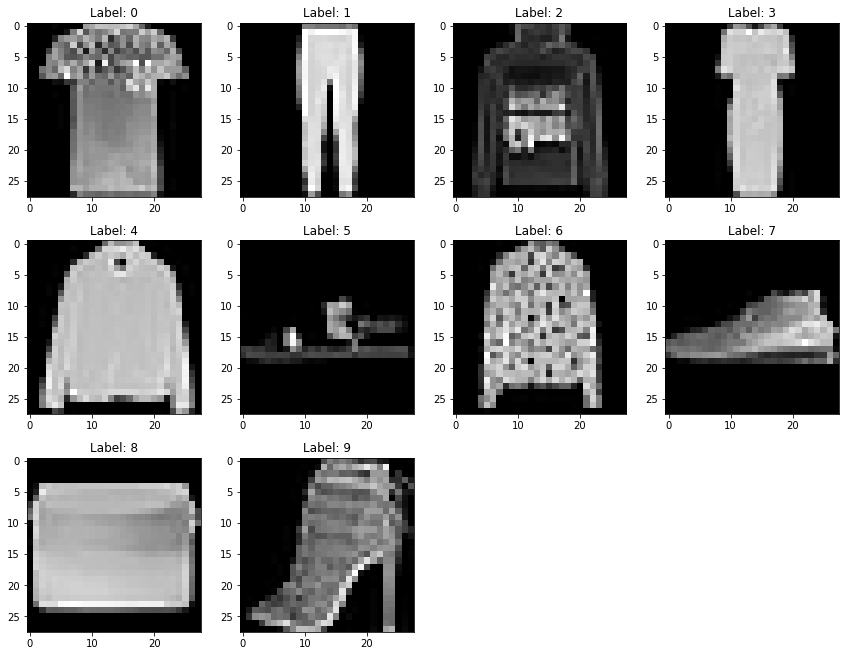

In [134]:
import math

X_norm_df = pd.DataFrame(X_norm, index=Y_sample.index)

def get_gt_sq(num):
    sq = math.sqrt(num)
    if float(int(sq)) != sq:
        sq += 1
    return int(sq)

imsq = get_gt_sq(len(X.to_numpy()[0]))
labelsq = get_gt_sq(Y.nunique())

subplot_df = pd.DataFrame()

plt.figure(figsize=(labelsq*3, labelsq*3))
subplot_itr = 1

for label in Y_sample.sort_values().unique():
    plt.subplot(labelsq, labelsq, subplot_itr)
    i = Y_sample.loc[Y_sample == label].index[0]
    plt.imshow(X_norm_df.loc[i].to_numpy().reshape(imsq, imsq), cmap='gray')
    plt.title(f'Label: {Y[i]}')
    subplot_itr += 1

plt.tight_layout()
plt.show()

#### 2. Apply PCA to the data and get the first two principal components.

In [137]:
pca = PCA(n_components = 2)

X_pca = pca.fit_transform(X_norm)

array([[ 5.88127356,  4.15250664],
       [-1.45553997, -0.58625525],
       [ 2.89855756,  5.71122801],
       ...,
       [ 1.42795669, -0.40547473],
       [-1.23569998,  3.9771731 ],
       [-7.40468541, -1.45581039]])

### 3. Using the first two principal components, draw a graph of the data by coloring and labeling the data points as we did in the checkpoint.

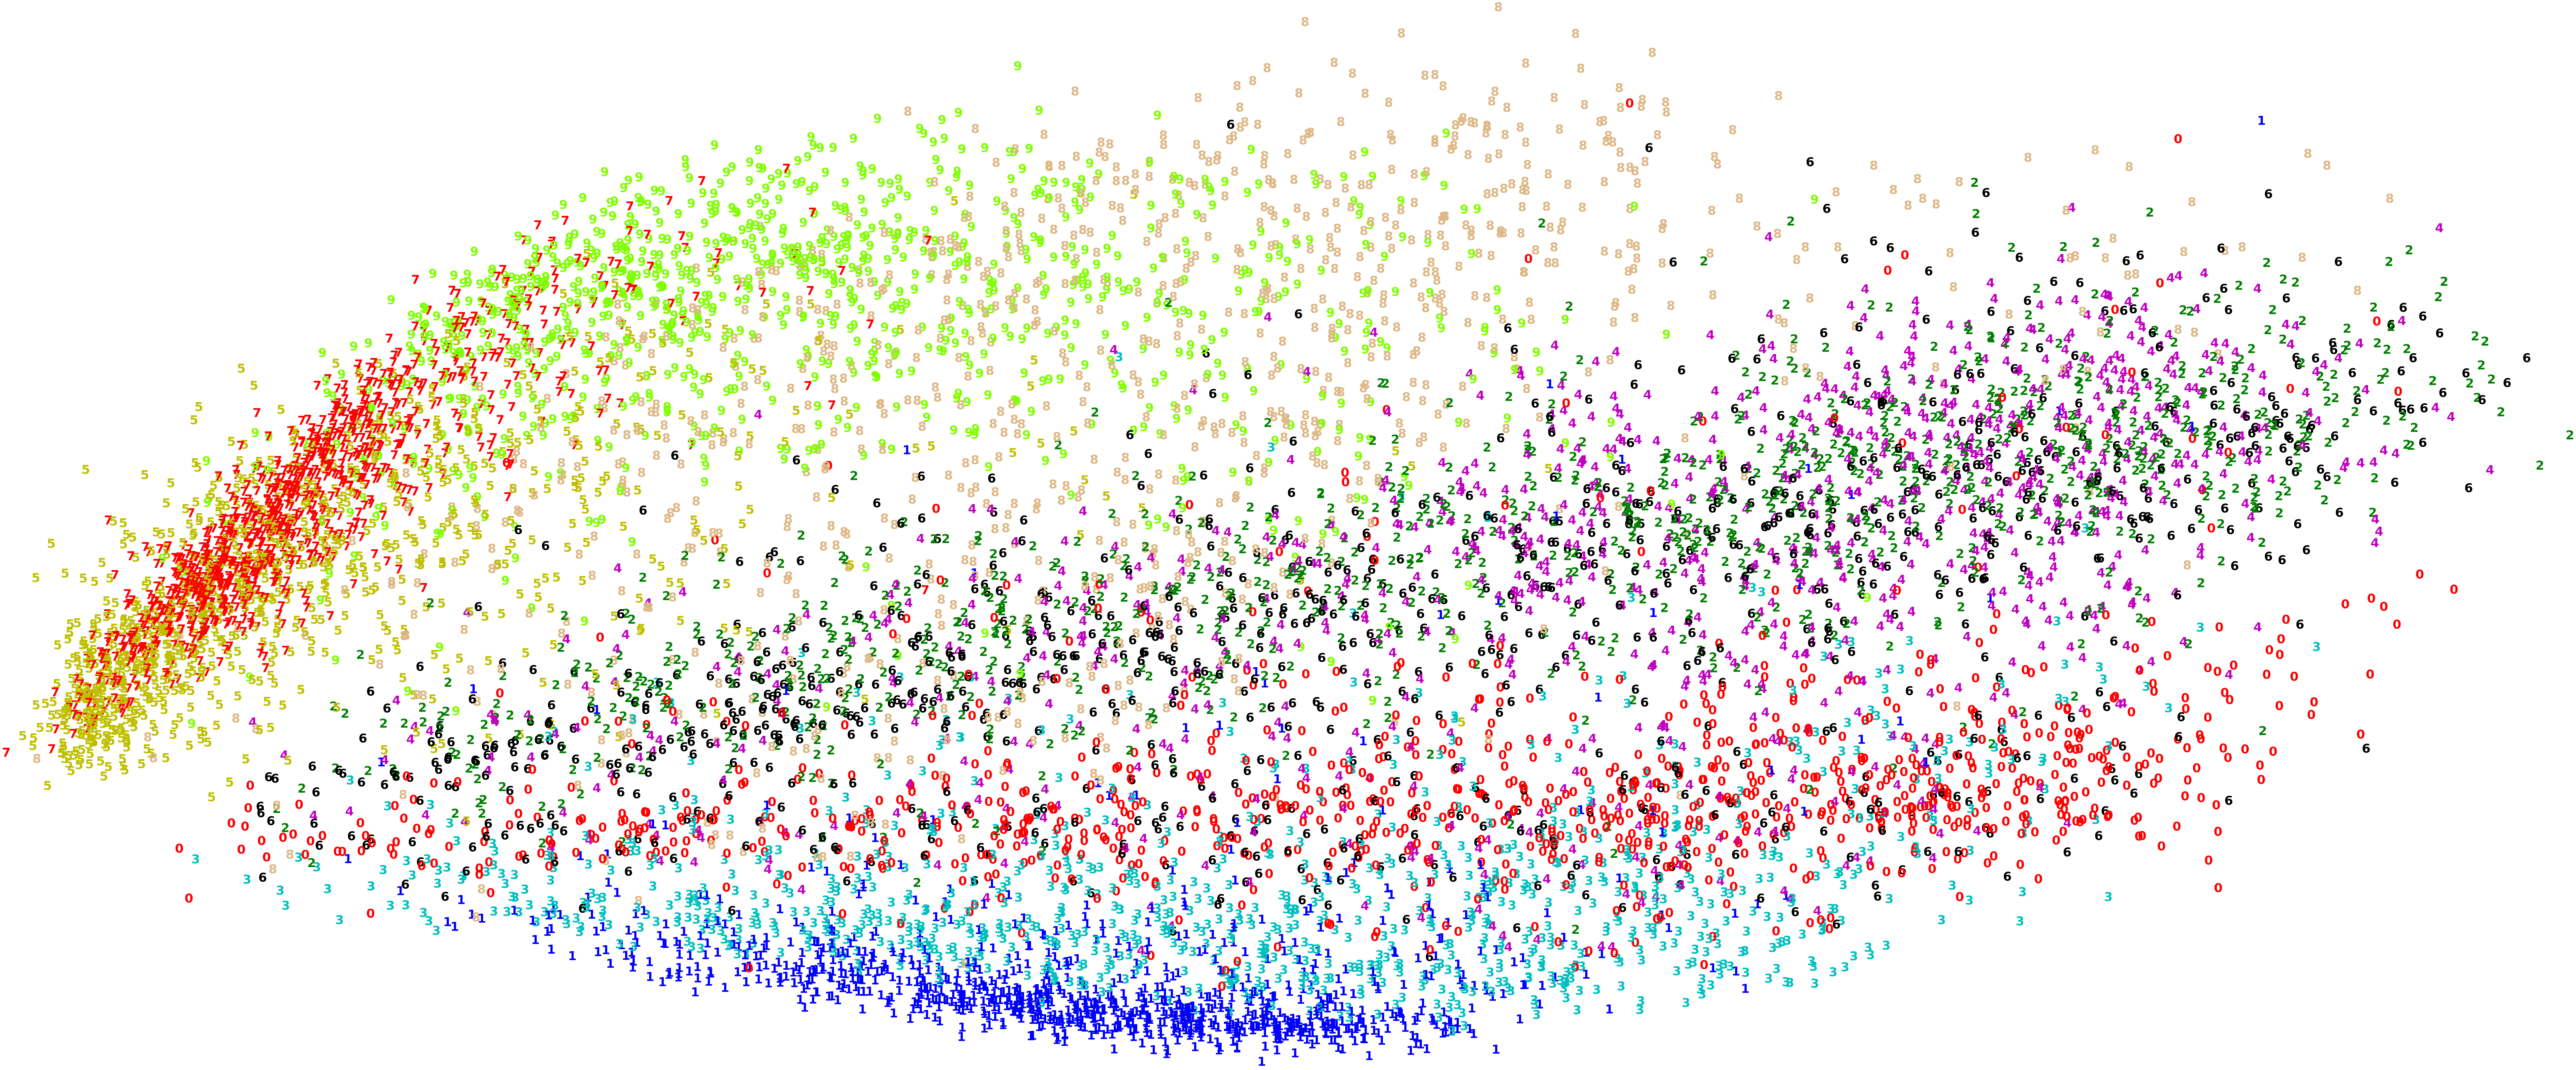

In [145]:
plt.figure(figsize=(10,5))
colours = ["r","b","g","c","m","y","k","r","burlywood","chartreuse"]
y = Y_sample.to_numpy()
for i in range(X_pca.shape[0]):
    plt.text(X_pca[i, 0], X_pca[i, 1], str(y[i]),
             color=colours[int(y[i])],
             fontdict={'weight': 'bold', 'size': 50}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

#### 4. Do you think PCA solution is satisfactory? Can you distinguish between different classes easily?

I don't think this 2-component solution is satisfactory. While I can see some separable groups (best is group 1), I could not fit a model to this PCA and have it find separable groups between the data.